# Set Environment

In [3]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import random as rn

In [4]:
np.random.seed(123)
tf.random.set_seed(456)
rn.seed(789)

In [5]:
!git clone https://github.com/Napasakon/DADS7202_CNN_Image_Classifier.git
!unzip -o /content/DADS7202_CNN_Image_Classifier/dataset.zip -d /content/DADS7202_CNN_Image_Classifier/

Cloning into 'DADS7202_CNN_Image_Classifier'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 10.46 MiB | 24.46 MiB/s, done.
Archive:  /content/DADS7202_CNN_Image_Classifier/dataset.zip
   creating: /content/DADS7202_CNN_Image_Classifier/sepak trakaw/
  inflating: /content/DADS7202_CNN_Image_Classifier/__MACOSX/._sepak trakaw  
  inflating: /content/DADS7202_CNN_Image_Classifier/sepak trakaw/IMG (91).jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/__MACOSX/sepak trakaw/._IMG (91).jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/sepak trakaw/IMG (29).jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/__MACOSX/sepak trakaw/._IMG (29).jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/sepak trakaw/IMG (68).jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/__MACOSX/sepak trakaw

In [6]:
def generate_npy_dataset(srcPath, desPath, imgSize=(224,224), outName='out', classNo=1):
  arr = os.listdir(srcPath)
  x = []
  y = []

  for filename in arr:
      file_destination = srcPath + filename

      img = cv2.imread(file_destination)
      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(RGB_img, imgSize)
      x.append(img)
      y.append(classNo)
  np.save(desPath + 'x_' + outName, x)
  np.save(desPath + 'y_' + outName, y)

In [7]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/sepak trakaw/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='sepak_trakaw',
                     classNo=0)

In [8]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/kendo/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='kendo',
                     classNo=1)

In [9]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/handball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='handball',
                     classNo=2)

In [10]:
x0 = np.load('/content/DADS7202_CNN_Image_Classifier/x_sepak_trakaw.npy')
x1 = np.load('/content/DADS7202_CNN_Image_Classifier/x_kendo.npy')
x2 = np.load('/content/DADS7202_CNN_Image_Classifier/x_handball.npy')

print(x0.shape)
print(x1.shape)
print(x2.shape)

(125, 224, 224, 3)
(140, 224, 224, 3)
(130, 224, 224, 3)


In [11]:
y0 = np.load('/content/DADS7202_CNN_Image_Classifier/y_sepak_trakaw.npy')
y1 = np.load('/content/DADS7202_CNN_Image_Classifier/y_kendo.npy')
y2 = np.load('/content/DADS7202_CNN_Image_Classifier/y_handball.npy')

print(y0.shape)
print(y1.shape)
print(y2.shape)

(125,)
(140,)
(130,)


In [12]:
x = np.concatenate((x0, x1, x2))
y = np.concatenate((y0, y1, y2))
print(x.shape)
print(y.shape)

(395, 224, 224, 3)
(395,)


In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split

test_size = 0.3
x_train, x_test = train_test_split(x, test_size = test_size, random_state = 3)
y_train, y_test = train_test_split(y, test_size = test_size, random_state = 3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(276, 224, 224, 3)
(276,)
(119, 224, 224, 3)
(119,)


In [26]:
#Save restnet50 model in model variable
modelNoTrain = tf.keras.applications.resnet_v2.ResNet50V2()

In [17]:
#Pre-processing
x_train_rn = tf.keras.applications.resnet_v2.preprocess_input(x_train)
x_test_rn = tf.keras.applications.resnet_v2.preprocess_input(x_test)

print(x_train_rn.shape)
print(x_test_rn.shape)

(276, 224, 224, 3)
(119, 224, 224, 3)


In [28]:
from keras.applications import resnet_v2

35363/35363 [==============================] - 0s 0us/step


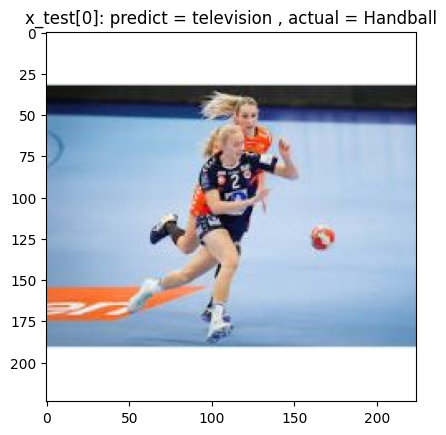

1/1 [==============================] - 0s 23ms/step


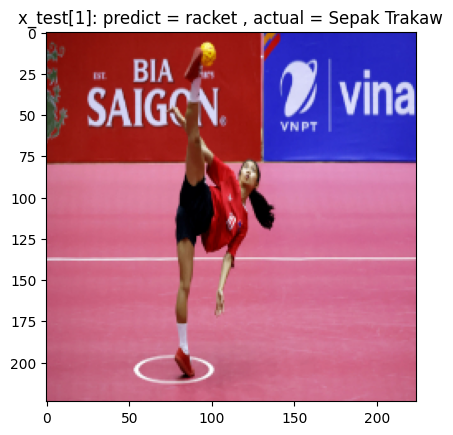

1/1 [==============================] - 0s 25ms/step


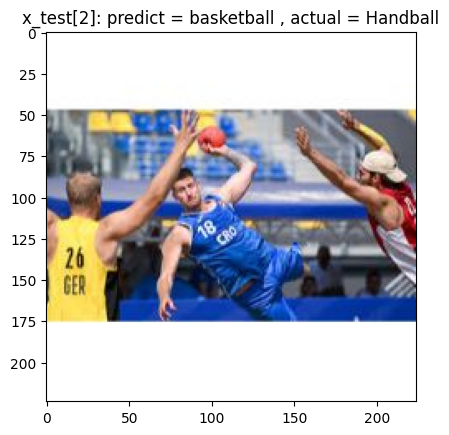

1/1 [==============================] - 0s 22ms/step


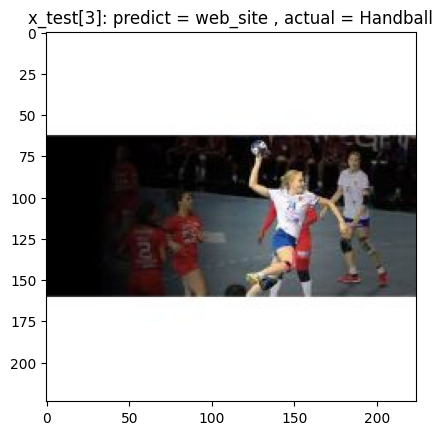

1/1 [==============================] - 0s 23ms/step


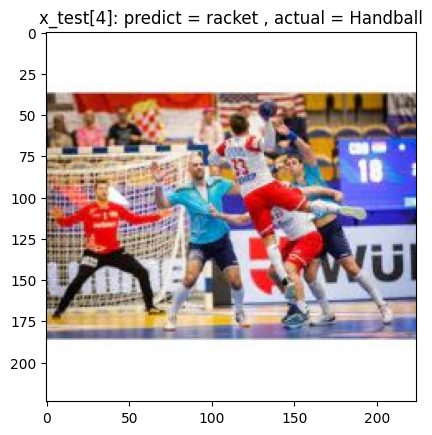

In [30]:
#Predict the inputs on the model
label = ['Sepak Trakaw','Kendo','Handball']
for i in range(5):
  x_input = x_test_rn[i][np.newaxis, ...]
  predict_img = modelNoTrain.predict(x_input)
  #Let's predict top 5 results
  top_five_predict = resnet_v2.decode_predictions(predict_img, top=1)
  top_five_predict
  plt.imshow(x_test[i])
  plt.title('Predict: ' + str(top_five_predict))
  plt.title(f'x_test[{i}]: predict = {top_five_predict[0][0][1]} , actual = {label[int(y_test[i])]}')
  plt.show()